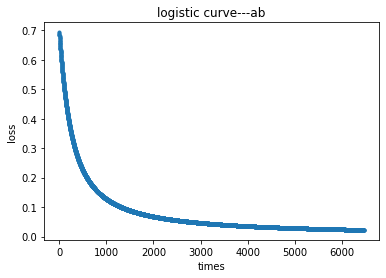

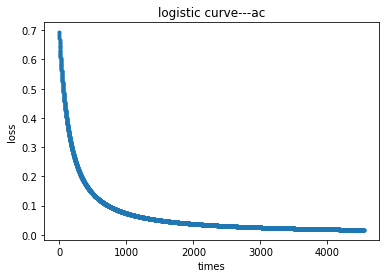

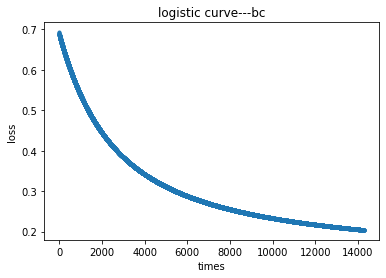

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        15
     class 1       1.00      1.00      1.00        16
     class 2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [11]:
import random
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
# from logisticModel import LogisticModel
import numpy as np

# 由于notebook上无法导入另一个文件的类，所以将之前实现的类移到了这里
class LogisticModel(object):
    def __init__(self, x, y, study_rate = 0.005, min = 0.0001):
        self.x = x                   # 训练数据
        self.y = y                   # 训练标记
        self.study_rate = study_rate # 模型学习率
        self.min = min               # 模型精度
        self.cnt = len(x[0])         # 模型参数个数
        self.LOSS = []               # 损失值
        # self.theta = np.array(       # 模型参数,初始阶段为-1到1之间的随机数
        #     [[random.uniform(-1, 1)] for i in range(self.cnt)])
        self.theta = np.array(       # 模型参数,初始阶段为全0
            [[0.0] for i in range(self.cnt)])
        self.all_sample = 0          # 所有测试样本数量
        self.accuracy = 0            # 模型准确率

    # 对数几率函数
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))


    # 损失函数
    def loss(self, theta):
        # 计算变量乘积
        X = np.dot(self.x, theta)
        loss = 0
        for i in range(len(X)):
            loss += -1 * self.y[i][0] * np.log(self.sigmoid(X[i][0])) - (1 - self.y[i][0]) * np.log(1 - self.sigmoid(X[i][0])) 

        # 记录损失值，方便后续画图
        loss /= len(X)
        self.LOSS.append(loss)
        # print(loss)
        return loss


    # 损失函数梯度计算
    def gradient(self, theta):
        # 计算变量乘积
        X = np.dot(self.x, theta)
        # 一定要注意不要忘记添加sigmoid
        delta = self.sigmoid(X) - self.y
        delta = np.dot(self.x.T, delta) * self.study_rate * (1 / len(X))
        return delta

    # 检测迭代是否结束，其实只需检验减小的值是否都小于临界值
    def check(self, delta):
        for i in delta:
            if abs(i[0]) > self.min:
                return True
        return False


    # 迭代，梯度下降过程
    def fit(self):
        # 先计算初始损失值
        self.loss(self.theta)
        # 根据梯度下降法得到参数的下降值
        Gradient = self.gradient(self.theta)
        # 根据check函数迭代到临界点，结束迭代

        '''
        测试用
        count = 0
        '''
        while(self.check(Gradient)):
            # 梯度下降
            self.theta -= Gradient
            # 更新LOSS
            self.loss(self.theta)
            # print(self.loss(self.theta))
            Gradient = self.gradient(self.theta)


    # 对数几率函数的预测值
    def select(self, n):
        if(n >= 0.5):
            return 1
        else:
            return 0

    # 模型预测
    def predict(self, x, Y):
        # 计算变量乘积
        X = np.dot(x, self.theta)
        self.all_sample = len(X)
        right_sample = 0
        pre = []
        for i in range(self.all_sample):
            y_pre = self.select(self.sigmoid(X[i]))
            pre.append(y_pre)
            if(y_pre == Y[i]):
                right_sample += 1
        # print("预测正确的数量为： %d" %right_sample)
        # self.accuracy = right_sample * 1.0 / self.all_sample
        # print("预测正确率为： %.4f" %self.accuracy)
        return pre
    
    # 模型评估
    def model_report_watermelon(self, pre, Y):
        '''
        调用sklearn库中的分类指标的文本报告
        pre: 预测的标记
        Y  : 真实的标记
        '''
        target_names = ['class 0', 'class 1']
        print(classification_report(Y, pre, target_names=target_names))

    def model_report_iris(self, pre, Y):
        target_names = ['class 0', 'class 1', 'class 2']
        print(classification_report(Y, pre, target_names=target_names))

    # 模型损失值展示
    def model_show(self, mark):
        times = range(len(self.LOSS))
        plt.plot(times, self.LOSS, '.-',label="Train_Loss")
        plt.title('logistic curve---' + mark)
        plt.xlabel('times')
        plt.ylabel('loss')
        plt.show()




# 具体分类结果
x1_train = []
x2_train = []
x3_train = []
x1_test = []
x2_test = []
x3_test = []
Y1_train = []
Y2_train = []
Y3_train = []
Y1_test = []
Y2_test = []
Y3_test = []

def Classification(x_train, x_test, Y_train, Y_test):
    '''
    手动将数据集内各个样本分离，方便进行两两预测
    input:  输入即为train_test_split函数分离的输出
    '''
    for i in range(len(Y_train)):
        if(Y_train[i] == 0):
            Y1_train.append(Y_train[i])
            x1_train.append(list(x_train[i]))
        elif(Y_train[i] == 1):
            Y2_train.append(Y_train[i])
            x2_train.append(list(x_train[i]))
        else:
            Y3_train.append(Y_train[i])
            x3_train.append(list(x_train[i]))

    for i in range(len(Y_test)):
        if(Y_test[i] == 0):
            Y1_test.append(Y_test[i])
            x1_test.append(list(x_test[i]))
        elif(Y_test[i] == 1):
            Y2_test.append(Y_test[i])
            x2_test.append(list(x_test[i]))
        else:
            Y3_test.append(Y_test[i])
            x3_test.append(list(x_test[i]))

# 根据三个模型的预测情况，预测最终结果
def final_predict(pre12, pre13, pre23):
    '''
    input: 三个模型的预测值,数组,均为01序列
    output: 最终预测值,数组,为012序列
    '''
    pre = []
    for i in range(len(pre12)):
        # 记录abc类被预测的次数
        a = b = c = 0
        if(pre12[i] == 0):
            a += 1
        else:
            b += 1
        if(pre13[i] == 0):
            a += 1
            if(a == 2):
                pre.append(0)
                continue
        else:
            c += 1
        if(pre23[i] == 0):
            b += 1
            if(b == 2):
                pre.append(1)
                continue
        else:
            c += 1
            if(c == 2):
                pre.append(2)
                continue
        # 如果abc分别预测出1次
        pre.append(random.randint(0,2))
    return pre

#导入数据和标签
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

#划分为训练集和测试集数据
x_train, x_test, Y_train, Y_test = train_test_split(iris_X, iris_y, test_size=0.3)
Classification(x_train, x_test, Y_train, Y_test)

# 样本两两组合
x12_train = np.vstack((np.array(x1_train), np.array(x2_train)))
x13_train = np.vstack((np.array(x1_train), np.array(x3_train)))
x23_train = np.vstack((np.array(x2_train), np.array(x3_train)))
x12_test = np.vstack((np.array(x1_test), np.array(x2_test)))
x13_test = np.vstack((np.array(x1_test), np.array(x3_test)))
x23_test = np.vstack((np.array(x2_test), np.array(x3_test)))

y12_train = np.vstack((np.array(Y1_train).reshape(-1, 1), np.array(Y2_train).reshape(-1, 1)))
y13_train = np.vstack((np.array(Y1_train).reshape(-1, 1), np.array(Y3_train).reshape(-1, 1)))
y23_train = np.vstack((np.array(Y2_train).reshape(-1, 1), np.array(Y3_train).reshape(-1, 1)))
Y12_test = Y1_test + Y2_test
Y13_test = Y1_test + Y3_test
Y23_test = Y2_test + Y3_test

for i in range(len(y13_train)):
    if(y13_train[i][0] == 2):
        y13_train[i][0] = 1
for i in range(len(y23_train)):
    if(y23_train[i][0] == 1):
        y23_train[i][0] = 0
    else:
        y23_train[i][0] = 1

'''以上为数据预处理，接下来准备进行分类'''

# 使用三个logistic模型
model12 = LogisticModel(x12_train, y12_train)
model13 = LogisticModel(x13_train, y13_train)
model23 = LogisticModel(x23_train, y23_train)

# 模型训练
model12.fit()
model13.fit()
model23.fit()

# 这里的Y_test并没有参与准确度运算，所以不用对他进行转换
pre12 = model12.predict(x_test, Y_test)
pre13 = model13.predict(x_test, Y_test)
pre23 = model23.predict(x_test, Y_test)

# 画图
model12.model_show("ab")
model13.model_show("ac")
model23.model_show("bc")

pre = final_predict(pre12, pre13, pre23)

# 最终结果分析
model12.model_report_iris(pre, Y_test)